<a href="https://colab.research.google.com/github/yosaphatprs/PCVK_Ganjil_2023/blob/main/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum Modul 11 - Object Detection Method**
## Nama: Josafat Pratama S.
## No  : 15
## NIM : 2141720031

## **Pengayaan Materi KTP**

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
src = cv2.imread('/content/drive/MyDrive/PCVK_TI/Images/KTP/ktp3.png')
blurred = src.copy()
gray = blurred.copy()

In [4]:
# Filtering
for i in range(10):
 blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

In [5]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

168.0 (300, 493)


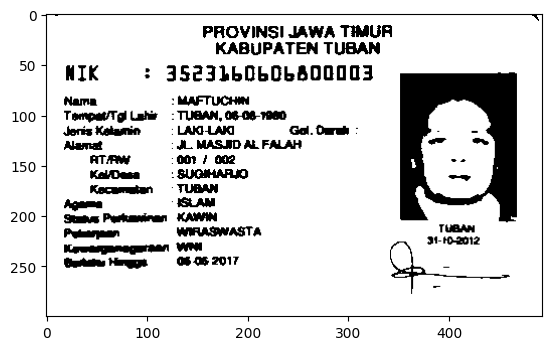

In [6]:
plt.imshow(bw, cmap='gray')

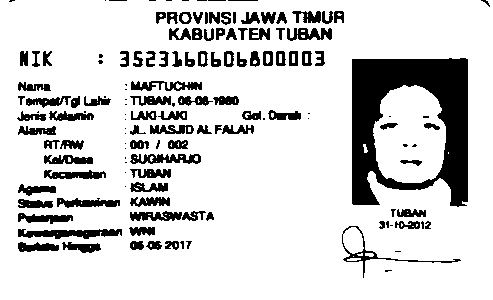

In [7]:
# Morfologi menggunakan metode opening
kernel = np.ones((1,1),np.uint8)
openn = cv2.morphologyEx(bw,cv2.MORPH_OPEN, kernel)
cv2_imshow(openn)

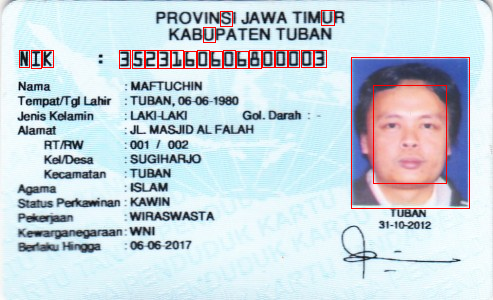

In [8]:
# Deteksi Contour
contours,  hierarchy= cv2.findContours(openn, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Gambar Contour
ktp_ori = src.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 15 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp_ori, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 45 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp_ori, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cv2_imshow(ktp_ori)

## **Tugas Praktikum**

Anggota Kelompok:
1. Dhoriffito Diansyah Putra (2141720201/11)
2. Josafat Pratama Susilo (2141720031/15)
3. Maidy Putri Joshi (2141720060/18)
4. Nasyawa Ramadhia K.S.E (2141720011/22)
5. Novita Dwi Rahmadani (2141720050/23)

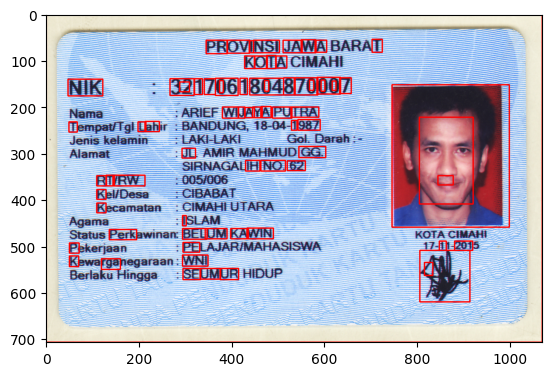

In [22]:
src = cv2.imread('/content/drive/MyDrive/PCVK_TI/Images/KTP/ktp2.png')
blurred = src.copy()
gray = blurred.copy()

blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv2.rectangle(src, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

# Menampilkan gambar KTP dengan kontur menggunakan plt
ktp_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()